In [158]:
! pip install networkx
! pip install plotly
! pip install colorlover
! pip install colour
! pip install NRCLex

     |████████████████████████████████| 399kB 5.6MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-cp36-none-any.whl size=43313 sha256=314371fd387e78a66660f4f4e2248ff6289198df9bd343bffcafa7321d7ac131
  Stored in directory: /root/.cache/pip/wheels/17/31/64/035a8d245b4c217aeb8e8a2702d05dc91544b9c2334db72414
Successfully built NRCLex


In [160]:
#imports
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math

import random

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
init_notebook_mode(connected=True)

from collections import Counter
import re
import nltk
nltk.download('stopwords')
import colorlover as cl
from IPython.display import HTML
import operator
from nrclex import NRCLex
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

# Q1 Choose a hashtag - #india

In [3]:
#df = pd.read_csv("tweets2009-06-0115.csv", sep='\t')
df = pd.read_csv("tweets2009-06-0115.csv.zip", sep='\t', compression='zip')


In [4]:
print("Num of rows:", df.shape[0])

Num of rows: 3437690


In [5]:
hashTag = df[df["tweet"].str.lower().str.contains("#india", na=False)].copy()

In [21]:
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows
hashTag[:100]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.



,date,user,tweet,mentioned
4254,2009-06-11 17:05:56,india_business,#india #business : Railways may take the private route for power: With consumption set to incr.. http://tinyurl.com/ldnslo,[]
4377,2009-06-11 17:06:16,india_business,#india #business : Who is the media accountable to?: Television news channels seem obsessed wi.. http://tinyurl.com/knkje2,[]
6103,2009-06-11 17:08:28,india_business,#india #business Tech Mahindra not to retrench Satyam employees http://tinyurl.com/mulwaf,[]
9387,2009-06-11 17:11:48,headlinesindia,"India, US for joint working group to boost education | http://uurl.in/rxx3 #US #India #Education",[]
11227,2009-06-11 17:13:41,headlinesindia,Seven Indians in Asian boxing semifinals | http://uurl.in/b7o4 #Sports #Indians,[]
...,...,...,...,...
704147,2009-06-12 08:45:07,headlinesindia,Tamil star Trisha teams up with Akshay http://uurl.in/oji2 #Indian actors #Bollywood #Akshay kumar,[]
717381,2009-06-12 09:06:13,santosh7g,Just added myself to the http://wefollow.com twitter directory under: #Indian #christian #web,[]
730474,2009-06-12 09:27:30,india_business,#india #insurance Irda seeks policy papers in local languages http://tinyurl.com/mwnc9x,[]
730522,2009-06-12 09:27:33,india_business,#india #insurance Kolkata tops insurance ombudsman complaint http://tinyurl.com/lclmg6,[]


In [7]:
hashTag.to_csv('india.csv')

In [8]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ,.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [9]:
addMentionedColumn(hashTag)

# Q2 build a mention graph

In [10]:
# for all the tweets with your hashtag, build the mention graph
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [43]:
hashTagGraph = mentionGraph(hashTag)

## a) How many nodes and how many edges are in your mention graph?


In [44]:
print("# nodes:", len(hashTagGraph.nodes()))
print("# edges:", len(hashTagGraph.edges()))

# nodes: 156
# edges: 121


## b)Build a histogram of the graph nodes’ degree

In [45]:
de = dict(hashTagGraph.degree)
print("de",de.values())

de dict_values([1, 1, 2, 2, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 10, 1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2, 4, 2, 2, 7, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 11, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 19, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1])


In [126]:
Counter(de.values())

Counter({1: 120, 2: 25, 3: 3, 4: 4, 7: 1, 10: 1, 11: 1, 19: 1})

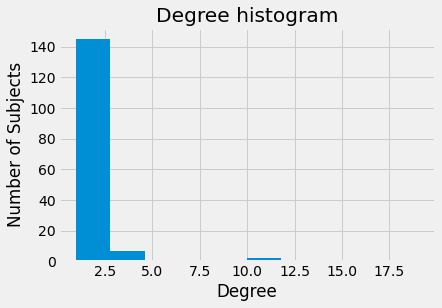

<Figure size 432x288 with 0 Axes>

In [153]:
plt.hist(list(de.values()))
#plt.style.use('fivethirtyeight')
plt.xlabel('Degree')
plt.ylabel('Number of Subjects')
plt.title('Degree histogram')
plt.show()
plt.savefig('hist_degree.png') #Save as file, format specified in argument

From the histogram, we can see that most of the nodes have a degree of 1, with the largest being around 19. Most of the mentions only happened once, and it also suggests that the group is not connected very strong.

## c) Build a log-log scatterplot with the node degree (x-axis) and fraction of nodes with that degree (y-axis). Does your mention graph exhibit a power law trend? If not, can you explain why that may be?

In [238]:
degrees = []
frac = []
for val in de.values():
  if val not in degrees:
    frac.append((Counter(de.values())[val] )/156)
    degrees.append(val)


In [239]:
frac

[0.7692307692307693,
 0.16025641025641027,
 0.019230769230769232,
 0.00641025641025641,
 0.02564102564102564,
 0.00641025641025641,
 0.00641025641025641,
 0.00641025641025641]

In [240]:
degrees

[1, 2, 3, 10, 4, 7, 11, 19]

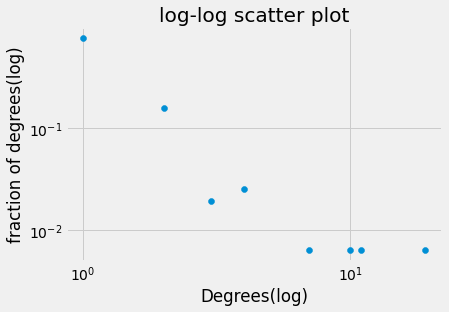

<Figure size 432x288 with 0 Axes>

In [241]:
plt.scatter(degrees, frac)
plt.xlabel('Degrees(log)')
plt.xscale('log')
plt.ylabel('fraction of degrees(log)')
plt.yscale('log')
plt.title('log-log scatter plot')
plt.show()
plt.savefig('scatter_degree.png') #Save as file, format specified in argument

Yes it does exhibit a power law trend, as the degree gets highers its occurance decreases, hence the smaller fraction

## d) For the highest-weighted edge, list the tweets (up to 25) for that edge

In [47]:
edges = hashTagGraph.edges(data = True)


In [58]:
edgesDf = pd.DataFrame(edges, columns=['node 1', 'node 2','numberMentions'])
edgesDf = pd.concat([edgesDf.drop(['numberMentions'], axis=1), edgesDf['numberMentions'].apply(pd.Series)], axis=1)
edgesDf.sort_values('numberMentions', ascending=False).head()

,node 1,node 2,numberMentions
4,mlbodds,teamrankings,8
76,gauravkanoongo,ndtv,4
82,top20reos,oohdonna,3
85,aphidcatcher,purnank,2
23,celebitter,gulpanag,2


In [42]:
df.loc[(df['user'] == 'mlbodds' ) & df['tweet'].str.lower().str.contains("#india") ] 

,date,user,tweet
123173,2009-06-11 20:14:39,mlbodds,6/12: Cardinals -105 at Indians -103. Brought to you by @TeamRankings (http://bit.ly/oBpZv) #mlb #cardinals #indians
939635,2009-06-12 14:14:56,mlbodds,6/12: Cardinals +107 at Indians -115. Total 10. Brought to you by @TeamRankings (http://bit.ly/oBpZv) #mlb #cardinals #indians
1052167,2009-06-12 16:14:26,mlbodds,6/12: Cardinals +107 at Indians -115. Total 10. Brought to you by @TeamRankings (http://bit.ly/oBpZv) #mlb #cardinals #indians
1345150,2009-06-12 22:14:41,mlbodds,6/13: Cardinals +105 at Indians -113. Total 10. Brought to you by @TeamRankings (http://bit.ly/oBpZv) #mlb #cardinals #indians
1950061,2009-06-13 12:14:13,mlbodds,6/13: Cardinals -101 at Indians -107. Total 10. Brought to you by @TeamRankings (http://bit.ly/oBpZv) #mlb #cardinals #indians
2027633,2009-06-13 14:14:13,mlbodds,6/13: Cardinals -101 at Indians -107. Total 10. Brought to you by @TeamRankings (http://bit.ly/oBpZv) #mlb #cardinals #indians
2114152,2009-06-13 16:14:19,mlbodds,6/13: Cardinals -101 at Indians -107. Total 10.5. Brought to you by @TeamRankings (http://bit.ly/oBpZv) #mlb #cardinals #indians
2297365,2009-06-13 20:15:04,mlbodds,6/14: Cardinals -102 at Indians -106. Total 7.5. Brought to you by @TeamRankings (http://bit.ly/oBpZv) #mlb #cardinals #indians


According to the output, the edge between user @mlbodds and @TeamRankings has the highest weight of 8 mentions, and it is because the user mlbodds frequently repost MLB cardinal vs indians score from @TeamRankings.

## e) Provide a visualization of the mention graph in which the edges visually (e.g., color, weight, etc.) reflects its weight (i.e., the number of mentions). 

In [32]:
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [49]:
addRandomPositions(hashTagGraph)

In [35]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [56]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

In [69]:
def plotNetwork(graph):
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth/8)) #maxmention is 8 from question 2d

        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                #text="Edge: %s\Weight: %f" % ((node1,node2), edgeWidth),
                text = 'cccccc',
                hoverinfo='text',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color = purd300[edgeColor]))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                hoverinfo='none',
                mode='markers', 
                marker=dict(
                    color="#888", 
                    size=10,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [70]:
configure_plotly_browser_state()
plotNetwork(hashTagGraph)

# Q3

## a) Analyze the most frequent non-stopwords in all the tweets with the chosen hash-tag, and provide a basic description of the main themes.

In [71]:
hashTag

,date,user,tweet,mentioned
4254,2009-06-11 17:05:56,india_business,#india #business : Railways may take the private route for power: With consumption set to incr.. http://tinyurl.com/ldnslo,[]
4377,2009-06-11 17:06:16,india_business,#india #business : Who is the media accountable to?: Television news channels seem obsessed wi.. http://tinyurl.com/knkje2,[]
6103,2009-06-11 17:08:28,india_business,#india #business Tech Mahindra not to retrench Satyam employees http://tinyurl.com/mulwaf,[]
9387,2009-06-11 17:11:48,headlinesindia,"India, US for joint working group to boost education | http://uurl.in/rxx3 #US #India #Education",[]
11227,2009-06-11 17:13:41,headlinesindia,Seven Indians in Asian boxing semifinals | http://uurl.in/b7o4 #Sports #Indians,[]
...,...,...,...,...
3366169,2009-06-14 22:20:46,knan,"RT @Sanju1: http://twitsnaps.com/~xgm Angelina Jolie, Brad Pitt traveling in an auto, when they were in #India. #Hollywood #Celebrity #Photo",[sanju1]
3389185,2009-06-14 22:50:12,operninha,"Aproveitando essa onda Indiana, vamos relembrar de #Golimar! http://bit.ly/3ocfT :D O Michael Jackson #Indiano! #india #michaeljackson",[]
3397613,2009-06-14 23:01:24,jwadlington,Great pitching matchup tonight at 8:00 on ESPN. Cards v. Indians. Carp v. Lee. #Cards #Indians #gocards,[]
3398222,2009-06-14 23:02:13,operninha,Mais um Clássico Indiano: Rivaldo sai desse lago! http://bit.ly/14T8jr #india :D #rivaldo ? #ronaldo,[]


In [76]:
def getTopKWords(df, kwords):
    stop = set(stopwords.words('english'))
    counter = Counter()
    tweets = df['tweet'].values

    for tweet in tweets:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', tweet) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [81]:
top20hashtah = getTopKWords(hashTag,30)
top20hashtah

[('http', 465),
 ('india', 322),
 ('com', 225),
 ('bit', 157),
 ('tinyurl', 146),
 ('2009', 129),
 ('business', 94),
 ('tax', 55),
 ('uurl', 52),
 ('indian', 52),
 ('indians', 43),
 ('news', 40),
 ('indiana', 36),
 ('jobs', 28),
 ('new', 27),
 ('twitter', 23),
 ('cardinals', 21),
 ('years', 21),
 ('exp', 20),
 ('insurance', 18),
 ('may', 17),
 ('nri', 17),
 ('twitpic', 17),
 ('indianewslive', 16),
 ('top', 15),
 ('help', 15),
 ('indianapolis', 15),
 ('food', 14),
 ('mumbai', 14),
 ('added', 14)]


The top tweets for hashtag #india are basically related to business development and news in india/indianapolis - tax, jobs, news etc, and lots of external websites url are mentioned in the tweets - most likely the news website. It also has some tweets regarding the MLB indians games vs the cardinals. 

## b)In a visualization of the mention graph add hover information for the nodes which lists the 3 most common words for each user. Indicate the nodes that have no words visually. For those nodes that have words, are the words similar for connected users or are the words different? If not the same, do the words have similar themes?

In [82]:
def getTopKuser(df, k, username):
    stop = set(stopwords.words('english'))
    counter = Counter()

    for tweet in df.loc[df['user']== username]['tweet']:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', tweet) 
                            if word.lower() not in stop and len(word) > 2 and word.isalpha()])
    topk = counter.most_common(k)
    return topk
    #df.loc[(df['user'] == 'mlbodds' ) & df['tweet'].str.lower().str.contains("#india") ] 

In [304]:
def plotNetworkSizeColor(graph):
   
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth/8)) #maxmention is 8 from question 2d

        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                #text="Edge: %s\Weight: %f" % ((node1,node2), edgeWidth),
                text = 'cccccc',
                hoverinfo='text',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color = purd300[edgeColor]))
        scatters.append(s)


    
    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        top3 = getTopKuser(hashTag, 3, node)
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> Top 3 words from tweets: %s" % (node, top3),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color = ("#800" if top3 == [] else "#123"), #no words
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2))) 

        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [305]:
configure_plotly_browser_state()
plotNetworkSizeColor(hashTagGraph)


The nodes with no top3 words marked with #800 color whereas the ones that has words are marked with color #123. And for those connected nodes with words, their words are pretty similar/have similar themes 

#Q4

## a) Using PageRank and a 2nd centrality measure of your choosing, calculate the centrality of the nodes on your graph based on each of the measures.

In [96]:
pageRank = nx.pagerank(hashTagGraph)
degCenter = nx.degree_centrality(hashTagGraph)

In [99]:
def plotNetworkSizeColor(graph,central):
   
    scatters=[]
    maxVal = max(central.values())
    minVal = min(central.values())

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        edgeColor = int(299*(edgeWidth/8)) #maxmention is 8 from question 2d

        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                #text="Edge: %s\Weight: %f" % ((node1,node2), edgeWidth),
                text = 'cccccc',
                hoverinfo='text',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color = purd300[edgeColor]))
        scatters.append(s)


    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        nodeCenter = central[node]
        nodeColor = int(299*(nodeCenter-minVal)/(maxVal-minVal))
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> centrality: %.3f" % (node, nodeCenter),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [100]:
#pageRank
configure_plotly_browser_state()
plotNetworkSizeColor(hashTagGraph,pageRank)

In [101]:
#degree centrality
configure_plotly_browser_state()
plotNetworkSizeColor(hashTagGraph,degCenter)

## b) List the 5 most central nodes for each of the centrality measures.

In [110]:
#degree Center
sorted_d = sorted(degCenter.items(), key=operator.itemgetter(1),reverse = True)
sorted_d[:5]

[('equestrian89', 0.12258064516129032),
 ('flazter', 0.07096774193548387),
 ('dgreetings', 0.06451612903225806),
 ('cwuw', 0.04516129032258064),
 ('blogginforbiz', 0.025806451612903226)]

In [113]:
#pagerank
sorted_d = sorted(pageRank.items(), key=operator.itemgetter(1),reverse = True)
sorted_d[:5]

[('equestrian89', 0.05943813728153696),
 ('flazter', 0.03327291229515131),
 ('dgreetings', 0.0329241968458967),
 ('jdan57', 0.015248236555469846),
 ('no2ar', 0.01387629781965577)]

In [306]:
#degree center
df.loc[(df['user'] == 'cwuw' ) & df['tweet'].str.lower().str.contains("#india") ] 

,date,user,tweet
962755,2009-06-12 14:38:53,cwuw,RT @ blogginforbiz #followfriday @duncan_alney @paulpoteet @gloveboxgourmet @cwuw -- Great #Indianapolis people


In [307]:
#degree center
df.loc[(df['user'] == 'blogginforbiz' ) & df['tweet'].str.lower().str.contains("#india") ] 

,date,user,tweet
933547,2009-06-12 14:08:10,blogginforbiz,#followfriday @duncan_alney @paulpoteet @gloveboxgourmet @cwuw -- Great #Indianapolis people


In [308]:
#pagerank
df.loc[(df['user'] == 'jdan57' ) & df['tweet'].str.lower().str.contains("#india") ] 

,date,user,tweet
1575238,2009-06-13 02:52:45,jdan57,"The teenager survived the strike, the chances of which are just 1 in a million - but with a nasty three-inch... re: http://ff.im/3UWkU\n2009-06-13 02:52:45\tlaila_flower\tMais uma dica de presente de casamento: http://www.shoptime.com.br/ShopProdF/21/108299542&placeOrigin=utilidades%20dom%C3%A9sticas\n2009-06-13 02:52:45\tlena_distractia\t@MDabbles where did you grow up?\n2009-06-13 02:52:45\tmooniicaa\t@karlaabila http://twitpic.com/79449 - super cool! :D\n2009-06-13 02:52:45\tpansydanger31\thttp://twitpic.com/795oo - JJ BLEND!!\n2009-06-13 02:52:45\tsharedideas\tLiked : Why Don’t Indians Leave Voicemails? http://ponyurl.com/rd7bpk #india #mobile #voicemail #vodafone #airtel... http://ff.im/-3UWtw\n2009-06-13 02:52:45\tshiirashiira\t@megane_chan I, too, was entertained. Tee-hee-hee, http://bit.ly/IZGWq\n2009-06-13 02:52:45\tsimplyenjoy\tJust changed my twitter background, check it out! Found it at http://www.TwitterBackgrounds.com\n2009-06-13 02:52:45\tteri_fied\t@Nora_78 I iz a pasty white wisconsinite...but I don't want to be in Houston\n2009-06-13 02:52:45\ttouchmatter\tTwitter social experiment for Photo+Map (#iPhone) has ended ! Thank everyone for your participation, more info at http://photoplusmap.com\n2009-06-13 02:52:45\twww__llll__com\tMarketing — Are Domain Companies doing all they can do?.. http://bit.ly/If4ou\n2009-06-13 02:52:46\tandysngr\tGood Morning again Tumblr. - Whoa, I felt the love after I woke up. Thank you for those who followed, liked... http://tumblr.com/xv8211fwy\n2009-06-13 02:52:46\tariacarlston\tBroadcasting live now! See me at http://www.ustream.tv/channel/crazy-aria\n2009-06-13 02:52:46\tbellatormma\tJusin Torrey shows some grits, pulling out the victory in the third round over Matt Makowski. http://tinyurl.com/mabcj8\n2009-06-13 02:52:46\tcurvaceous\tCan Memory Loss Be Prevented? http://bit.ly/j0nl6\n2009-06-13 02:52:46\tgoerlitz\tOh - is it bedtime already? Great evening with lots of friends. And let's not talk about who stunk at FIFA...\n2009-06-13 02:52:46\thuthuthike\tI’m flattered. And I think it’s hilarious."" - Kris Allen, in reposnse to Adam Lambert having a crush on him http://tumblr.com/x7f211fx0"


In [309]:
#pagerank
df.loc[(df['user'] == 'no2ar' ) & df['tweet'].str.lower().str.contains("#india") ] 

,date,user,tweet
1442081,2009-06-13 00:31:51,no2ar,@wishtv #indy might be able to get answers from #Indiana AG Zoeller posed in http://bit.ly/sU08b @WIBC @CNN @WTHR


Discuss the following:
1. Are the results between centrality measures similar or different? Explain a reason for the observed similarity or difference.
2. What centrality measure produced a more meaningful interpretation? Why?

1) The first three rankings match while the rest 2 are different. It might because in those two tweets listed by degree center they mentioned each other, which adds to the degree_centrality for those two users

2) In this case page rank produced a more meaningful interpretation, since the tweets from degree center is just retweets and contains much less information comparing to those from user listed by pagerank,

# Q5

## a) Using NRCLex, evaluate each tweet and determine the number of words in each dimension of emotion. Construct a chart showing the number of words in each emotion.

In [196]:
emotiondic  = {}
for index, tweet_data in hashTag.iterrows():
  tweet = tweet_data['tweet']
  text_object = NRCLex(tweet)

  relative_numbers = text_object.affect_frequencies
  absolute_numbers = text_object.raw_emotion_scores
  for key in absolute_numbers:
      if key not in emotiondic:
         emotiondic[key] = absolute_numbers[key]
      else:
         emotiondic[key] += absolute_numbers[key];



In [182]:
emotiondic

{'anger': 64,
 'anticipation': 114,
 'disgust': 29,
 'fear': 66,
 'joy': 109,
 'negative': 191,
 'positive': 229,
 'sadness': 119,
 'surprise': 45,
 'trust': 161}

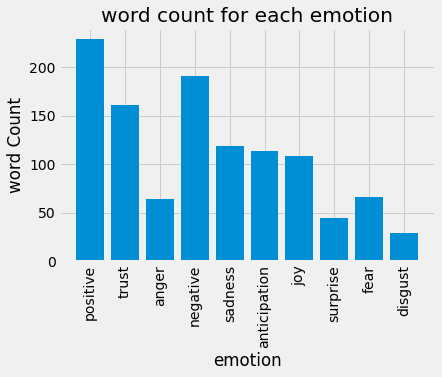

In [197]:
plt.bar(list(emotiondic.keys()),emotiondic.values())
plt.title('word count for each emotion')
plt.xlabel('emotion')
plt.xticks(rotation=90)
plt.ylabel('word Count')
plt.savefig('word count for emotion.png')


In [310]:
df.loc[(df['user'] == 'jmscottimd' ) & df['tweet'].str.lower().str.contains("#india") ] 

,date,user,tweet
996088,2009-06-12 15:13:10,jmscottimd,talbott street art fair saturday. who else is going? #indianapolis #indy


In [ ]:

df.loc[(df['user'] == 'cwuw' ) & df['tweet'].str.lower().str.contains("#india") ] 

,date,user,tweet
962755,2009-06-12 14:38:53,cwuw,RT @ blogginforbiz #followfriday @duncan_alney @paulpoteet @gloveboxgourmet @cwuw -- Great #Indianapolis people


According to the bar chart, positive is the most frequent emotion, and it makes sense since the main theme is around the good business development in india/indianapolis. The above twitters both shows the positivity towards the city of indianapolis 

## b)For each user, determine which fraction of a user’s total identified words are in each emotional affect (i.e., normalize the counts for each user). Identify the users with the highest fraction of words in each emotion.

In [208]:
userdic  = {}
usertotalwords = {}
for index, tweet_data in hashTag.iterrows():
  user = tweet_data['user']
  tweet = tweet_data['tweet']
  text_object = NRCLex(tweet)
  text_size = len(text_object.words)

  relative_numbers = text_object.affect_frequencies
  absolute_numbers = text_object.raw_emotion_scores
  if user not in usertotalwords:
    usertotalwords[user] = text_size
  else:
    usertotalwords[user] += text_size

  if user not in userdic:
    userdic[user] = absolute_numbers
  else:    
    for key in absolute_numbers:
      if key not in userdic[user]:
        userdic[user][key] = absolute_numbers[key]
      else:
        userdic[user][key] += absolute_numbers[key]



In [210]:
for user in userdic:
  for key in userdic[user]:
    userdic[user][key] = userdic[user][key]/usertotalwords[user] #find the fraction for each emotion for user


In [223]:
result = {}
for x in userdic: #x is username
  for y in userdic[x]: #y is emotion
    if y not in result:
      result[y] = [x,userdic[x][y]]
    elif result[y][1] < userdic[x][y]:
      result[y] = [x,userdic[x][y]]


In [224]:
result

{'anger': ['edrea20', 0.14285714285714285],
 'anticipation': ['purnank', 0.125],
 'disgust': ['freya3377', 0.0625],
 'fear': ['freya3377', 0.125],
 'joy': ['celebitter', 0.125],
 'negative': ['freya3377', 0.1875],
 'positive': ['jmscottimd', 0.18181818181818182],
 'sadness': ['tomcrowe', 0.15789473684210525],
 'surprise': ['jmscottimd', 0.09090909090909091],
 'trust': ['crstjohn81', 0.14285714285714285]}

## c) Construct a plot(s) to answer the following: Is there a correlation between any dimension of emotion and one of the centrality measures you evaluated? If you see a trend, please provide a hypothesis for why; if you do not see a trend, provide a hypothesis for why centrality of a user has no observed correlation with emotion in your particular dataset.


In [271]:
def emo_central_dic(emotion,centrality):
  resultc = {}
  for user in userdic:
    if emotion in userdic[user]:
      try:
        resultc[userdic[user][emotion]] = centrality[user]
      except:
        continue;
  return resultc

Text(0.5, 1.0, 'degree center vs fraction ')

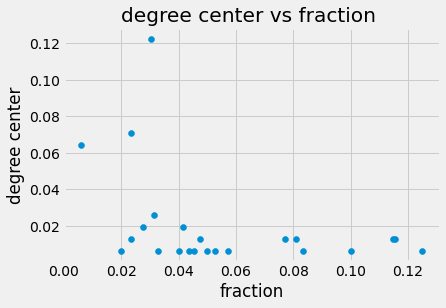

In [283]:
resultc = emo_central_dic('positive', degCenter)
plt.scatter(resultc.keys(),resultc.values())
plt.xlabel('fraction')
plt.ylabel('degree center')
plt.title('degree center vs fraction ')

Text(0.5, 1.0, 'page rank vs fraction ')

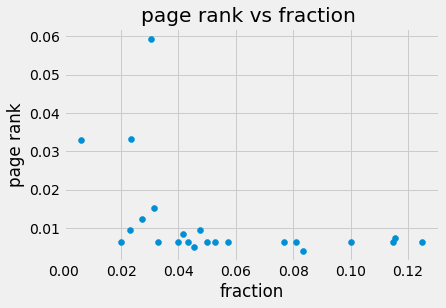

In [284]:
resultc = emo_central_dic('positive', pageRank)
plt.scatter(resultc.keys(),resultc.values())
plt.xlabel('fraction')
plt.ylabel('page rank')
plt.title('page rank vs fraction ')

Text(0.5, 1.0, 'page rank vs fraction ')

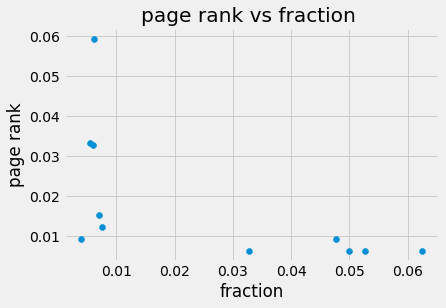

In [286]:
resultc = emo_central_dic('surprise', pageRank)
plt.scatter(resultc.keys(),resultc.values())
plt.xlabel('fraction')
plt.ylabel('page rank')
plt.title('page rank vs fraction ')

Text(0.5, 1.0, 'degree center vs fraction ')

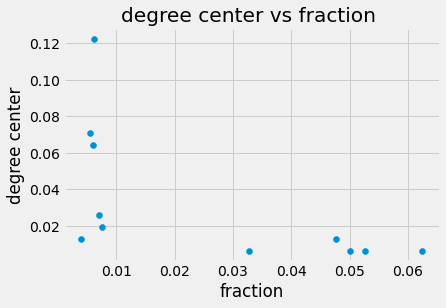

In [287]:
resultc = emo_central_dic('surprise', degCenter)
plt.scatter(resultc.keys(),resultc.values())
plt.xlabel('fraction')
plt.ylabel('degree center')
plt.title('degree center vs fraction ')

Text(0.5, 1.0, 'degree center vs fraction ')

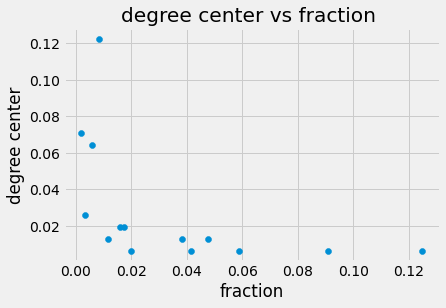

In [288]:
resultc = emo_central_dic('fear', degCenter)
plt.scatter(resultc.keys(),resultc.values())
plt.xlabel('fraction')
plt.ylabel('degree center')
plt.title('degree center vs fraction ')

Text(0.5, 1.0, 'degree center vs fraction ')

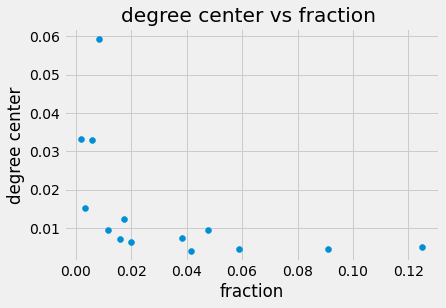

In [289]:
resultc = emo_central_dic('fear', pageRank)
plt.scatter(resultc.keys(),resultc.values())
plt.xlabel('fraction')
plt.ylabel('degree center')
plt.title('degree center vs fraction ')

Even thou there is no obvious trend in all graphs, but one trend i am seeing is that when the fraction is low (< 0.02), that user usually has a high degree centrallity for both degree center and page rank. That might be because twitter is penalizing on tweets with obvious emotions and trying to stay neutral/show only the facts in all sort of topics/tags. 

# Q6

 I completed the user study on Nov 29th at 6:53am using username: qiaoyi.yan@mail.utoronto.ca